# Квадратичный дискриминантный анализ (Quadratic Discriminant Analysis (QDA)) и линейный дискриминантный анализ (или линейный дискриминант Фишера) (Linear Discriminant Analysis (LDA))

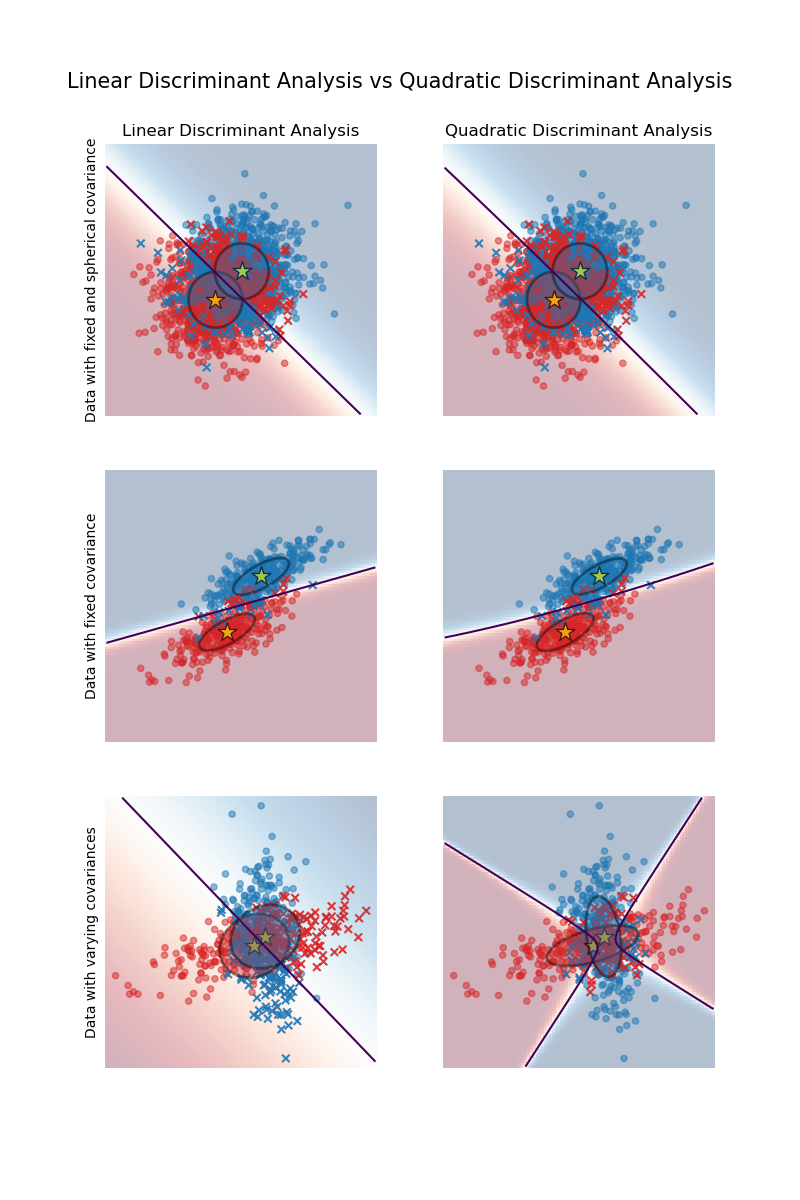



_Априорная вероятность_:

$$
{\rm Pr\,} y
$$

_Апостериорная вероятность_:

$$
{\rm Pr\,}(y \mid x) = \frac{p(x\mid y)\, {\rm Pr\,} y}{p(x)}\
$$

Линейный дискриминантный анализ (LDA) делает два предположения:

 - объекты каждого класса распределены по нормальному закону:

$$
p(x\mid y) = \frac{1}{\sqrt{(2\pi)^d\det\Sigma_y}}e^{-\frac{1}{2}(x-\mu_y)^{\top}\Sigma_y^{-1}(x-\mu_y)}
$$

 - матрицы ковариации $\Sigma = \Sigma_y$ одинаковы для всех классов


Нам нужно сравнить две апостериорные вероятности:

$$
{\rm Pr\,}(y \mid x) > {\rm Pr\,}(y' \mid x)
$$

Подставляя выражения для $p(x\mid y)$ и $p(x\mid y')$ и логарифмируя, приходим к неравенству:

$$
{-\frac{1}{2}(x-\mu_y)^{\top}\Sigma^{-1}(x-\mu_y)} + \ln {\rm Pr\,} y
>
{-\frac{1}{2}(x-\mu_{y'})^{\top}\Sigma^{-1}(x-\mu_{y'})} + \ln {\rm Pr\,} y'
$$

Откуда

$$
(\mu_y - \mu_{y'})^{\top} \Sigma^{-1} x >
\frac{1}{2}\mu_{y}^{\top}\Sigma^{-1}\mu_{y} - \frac{1}{2}\mu_{y'}^{\top}\Sigma^{-1}\mu_{y'}
- \ln {\rm Pr\,} y+ \ln {\rm Pr\,} y'
$$
т. е.
$$
w^{\top} x > c,
$$
где $w = (\mu_y - \mu_{y'})^{\top} \Sigma^{-1}$, а $c$ – некоторая константа.

Таким образом,

* уравнение $w^{\top} x = c$ задает разделяющую гиперплоскость между классами $y$ и $y'$
* важна линейная комбинация признаков $x$ с коэффициентами $w$

Введем _линейную дискриминантную функцию_:
$$
\delta_y(x) =
- \frac{1}{2}(x-\mu_1)^{\top}\Sigma^{-1}(x-\mu_1) + \frac{1}{2}x^{\top}\Sigma^{-1}x + \ln {\rm Pr}\,y
= \mu_y^{\top} \Sigma^{-1} x  - \frac{1}{2}\mu_y^{\top}\Sigma^{-1}\mu_y + \ln {\rm Pr}\,y
$$

Классификатор: объект $x$ относим к тому классу $y$, для которого $\delta_y(x)$ максимальна.

Здесь
$$
\rho(x,x') = \sqrt{(x-x')^{\top}\Sigma^{-1}(x-x')}
$$
– это _расстояние Махаланобиса_.


Введем _дискриминантную функцию QDA_:
$$
\delta_y(x) =
- \frac{1}{2}(x-\mu_1)^{\top}\Sigma_1^{-1}(x-\mu_1) + \frac{1}{2}(x-\mu_2)^{\top}\Sigma_2^{-1}(x-\mu_2) + \frac{1}{2}ln\frac{|Sigma_1|}{|Sigma_2|} + ln\frac{N_1}{N_2}
$$



In [3]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
import numpy as np

In [4]:
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
y = np.array([1, 1, 1, 2, 2, 2])
clf = QuadraticDiscriminantAnalysis()
clf.fit(X, y)
print(clf.predict([[-0.8, -1]]))

[1]


In [5]:
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
y = np.array([1, 1, 1, 2, 2, 2])
clf = LinearDiscriminantAnalysis()
clf.fit(X, y)
print(clf.predict([[-0.8, -1]]))

[1]


# K ближайших соседей (k-NN)

К-ближайших соседей (K-Nearest Neighbors или просто KNN) — алгоритм классификации и регрессии, основанный на гипотезе компактности, которая предполагает, что расположенные близко друг к другу объекты в пространстве признаков имеют схожие значения целевой переменной или принадлежат к одному классу.

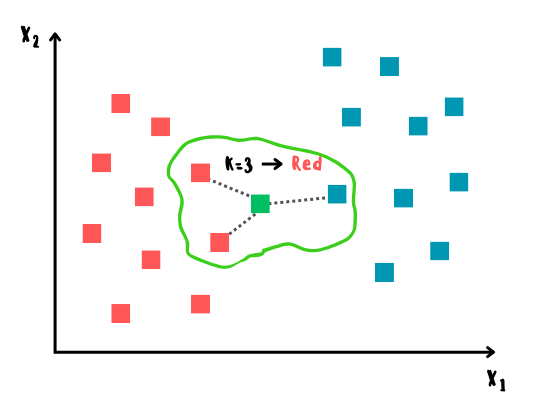

## **Принцип работы KNN**
Алгоритм строится следующим образом:
- 1) сначала вычисляется расстояние между тестовым и всеми обучающими образцами;
- 2) далее из них выбирается k-ближайших образцов (соседей), где число k задаётся заранее;
- 3) итоговым прогнозом среди выбранных k-ближайших образцов будет мода в случае классификации и среднее арифметическое в случае регрессии;
- 4) предыдущие шаги повторяются для всех тестовых образцов.

Существует множество метрик для вычисления расстояния между объектами, среди которых наиболее популярными являются следующие:
- **Евклидово расстояние** — это наиболее простая и общепринятая метрика, которая определяется как длина отрезка между двумя объектами $a$ и $b$ в пространстве с $n$ признаками и вычисляется по формуле:

$$d(a, b) = \sqrt{\sum_{i=1}^n (a_i - b_i)^2}$$

- **Манхэттенское расстояние** — метрика, которая определяется как сумма модулей разностей координат двух точек в пространстве между двумя объектами $a$ и $b$ с $n$ признаками и вычисляется по формуле:

$$d(a, b) = \sum_{i=1}^n |a_i - b_i|$$

- **Косинусное расстояние** — метрика, которая определяется как угол между двумя векторами $a$ и $b$ в пространстве с $n$ признаками и вычисляется по формуле:

$$d(a, b) = 1 - \frac{\sum_{i=1}^n a_i b_i}{\sqrt{\sum_{i=1}^n a_i^2} \sqrt{\sum_{i=1}^n b_i^2}}$$

### **Более быстрые оптимизации**
Описанный выше тип KNN называется **Brute-Force**, поскольку в нём используется метод полного перебора для поиска ближайших соседей, что делает его простым в реализации, но слишком медленным при работе с большим объемом данных. Для решения данной проблемы в реализации scikit-learn предусмотрены более продвинутые методы, основанные на бинарных деревьях, что позволяет получить значительный прирост в производительности.

#### **BallTree**
BallTree — это древовидная структура, в основе которой лежит разбиение исходного пространства данных на вложенные гиперсферы, что позволяет более эффективно отсекать большие области пространства, в которых отсутствуют ближайшие соседи для точек. В большинстве случаев такой алгоритм подходит для данных с произвольной метрикой расстояния.

#### **KD-Tree**
KD-Tree (k-dimensional tree) — ещё одна древовидная структура, отдалённо напоминающая BallTree, однако в данном случае используются гиперплоскости для разбиения точек вместо гиперсфер, что позволяет также эффективно оставлять лишь те области пространства данных, в которых могут присутствовать ближайшие соседи. Обычно KD-Tree больше подходит для данных с евклидовой или манхэттенской метрикой расстояния.

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score
from sklearn.datasets import load_iris, load_diabetes
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

In [23]:
X1, y1 = load_iris(return_X_y=True, as_frame=True)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1.values, y1.values, random_state=0)
print(X1, y1, sep='\n')

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
0      0
1      0
2      0
3      0
4   

In [24]:
class KNearestNeighbors:
    def __init__(self, n_neighbors=5, regression=False):
        self.n_neighbors = n_neighbors
        self.regression = regression

    def fit(self, X_train, y_train):
        self.X_train, self.y_train = X_train, y_train

    def _euclidean_distances(self, x_test_i):
        return np.sqrt(np.sum((self.X_train - x_test_i) ** 2, axis=1))

    def _make_prediction(self, x_test_i):
        distances = self._euclidean_distances(x_test_i)   # distances to all neighbors
        k_nearest_indexes = np.argsort(distances)[:self.n_neighbors]
        targets = self.y_train[k_nearest_indexes]   # k-nearest neighbors target values

        return np.mean(targets) if self.regression else np.bincount(targets).argmax()

    def predict(self, X_test):
        return np.array([self._make_prediction(x) for x in X_test])

In [25]:
def decision_boundary_plot(X, y, X_train, y_train, clf, feature_indexes, title=None):
    feature1_name, feature2_name = X.columns[feature_indexes]
    X_feature_columns = X.values[:, feature_indexes]
    X_train_feature_columns = X_train[:, feature_indexes]
    clf.fit(X_train_feature_columns, y_train)

    plot_decision_regions(X=X_feature_columns, y=y.values, clf=clf)
    plt.xlabel(feature1_name)
    plt.ylabel(feature2_name)
    plt.title(title)

In [26]:
knn_clf = KNearestNeighbors()
knn_clf.fit(X1_train, y1_train)
knn_clf_pred_res = knn_clf.predict(X1_test)
knn_clf_accuracy = accuracy_score(y1_test, knn_clf_pred_res)

print(f'KNN classifier accuracy: {knn_clf_accuracy:}')
print(knn_clf_pred_res)

KNN classifier accuracy: 0.9736842105263158
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


## k-NN из skleark

sk KNN classifier accuracy: 0.9736842105263158
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


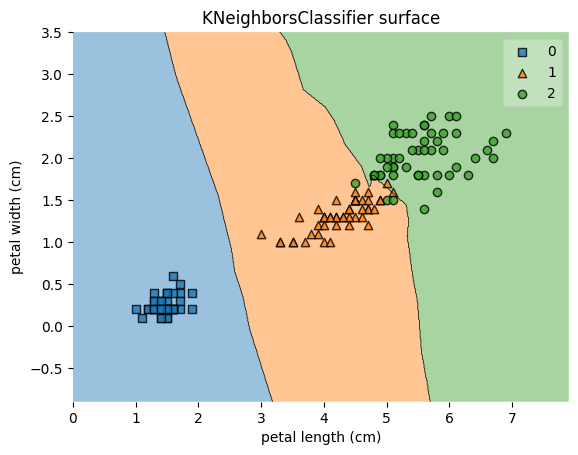

In [27]:
sk_knn_clf = KNeighborsClassifier()
sk_knn_clf.fit(X1_train, y1_train)
sk_knn_clf_pred_res = sk_knn_clf.predict(X1_test)
sk_knn_clf_accuracy = accuracy_score(y1_test, sk_knn_clf_pred_res)

print(f'sk KNN classifier accuracy: {sk_knn_clf_accuracy:}')
print(sk_knn_clf_pred_res)

feature_indexes = [2, 3]
title1 = 'KNeighborsClassifier surface'
decision_boundary_plot(X1, y1, X1_train, y1_train, sk_knn_clf, feature_indexes, title1)

### **Преимущества и недостатки KNN**
Преимущества:
- простота в реализации и интерпретации;
- применяется во многих задачах, особенно в рекомендательных системах;
- высокая точность прогнозов при правильном подборе k и метрики расстояния.

Недостатки:
- большое потребление памяти и низкая скорость работы из-за хранения и вычисления расстояний между всеми обучающими и тестовыми образцами (имеется в виду KNN в чистом виде);
- чувствительность к выбросам и шуму, а также к несбалансированным классам в данных;
- при большом количестве признаков может возникнуть проблема совпадения метрической и смысловой близости объектов, что решается с помощью обучения представлений (численное описание объектов).

# Подбор параметров алгоритма GridSearchCV

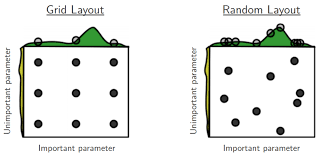

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
# define the parameter values that should be searched
k_range = list(range(1, 31))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [36]:
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [37]:
# instantiate the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

In [38]:
# fit the grid with data
grid.fit(X, y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=30),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy')

In [39]:
# view the results as a pandas DataFrame
import pandas as pd
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.960000,0.053333,{'n_neighbors': 1}
1,0.953333,0.052068,{'n_neighbors': 2}
2,0.966667,0.044721,{'n_neighbors': 3}
3,0.966667,0.044721,{'n_neighbors': 4}
4,0.966667,0.044721,{'n_neighbors': 5}
5,0.966667,0.044721,{'n_neighbors': 6}
6,0.966667,0.044721,{'n_neighbors': 7}
7,0.966667,0.044721,{'n_neighbors': 8}
8,0.973333,0.032660,{'n_neighbors': 9}
9,0.966667,0.044721,{'n_neighbors': 10}


In [40]:
# examine the first result
print(grid.cv_results_['params'][0])
print(grid.cv_results_['mean_test_score'][0])

{'n_neighbors': 1}
0.96


In [41]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.9800000000000001
{'n_neighbors': 13}
KNeighborsClassifier(n_neighbors=13)


# Cross-validation

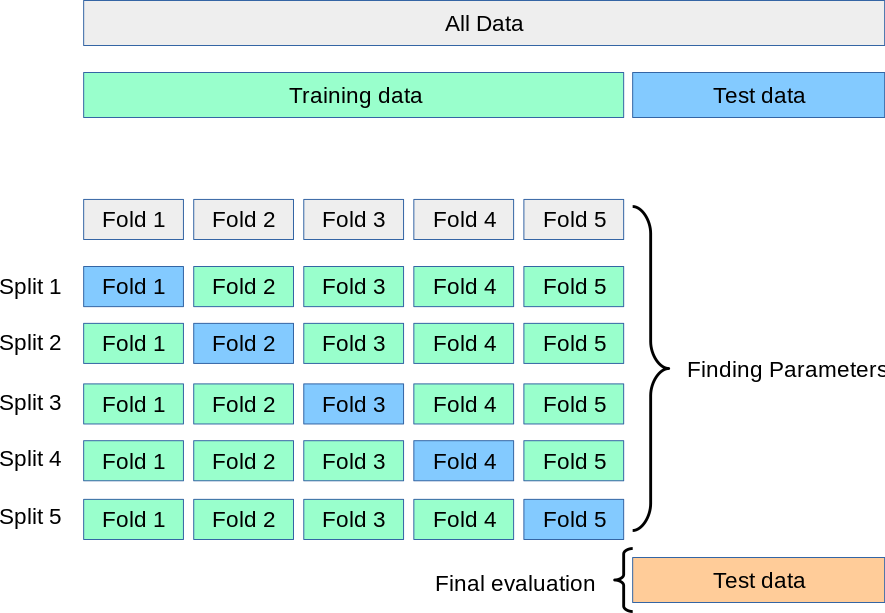

In [29]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [30]:
# read in the iris data
iris = load_iris()

# create X (features) and y (response)
X = iris.data
y = iris.target

In [31]:
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)

[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]


In [32]:
# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

0.9666666666666668


In [33]:
# search for an optimal value of K for KNN
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.96, 0.9533333333333334, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9800000000000001, 0.9666666666666666, 0.9666666666666666, 0.9733333333333334, 0.96, 0.9666666666666666, 0.96, 0.9666666666666666, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334]


# Validation

In [42]:
 X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=1)

 X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2